# Imports

In [31]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [85]:
import os
import numpy as np
import tensorflow as tf
import keras
import itertools

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

from time import strftime

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [82]:
LABEL_NAMES = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
IMAGE_COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * IMAGE_COLOR_CHANNELS
NR_CLASSES = 10


VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

LOG_DIR = 'tensorboard_cifar_logs/'

# Get the data

In [34]:
#Refer this for desciption of data: https://www.cs.toronto.edu/~kriz/cifar.html
(x_train_all , y_train_all), (x_test, y_test) = cifar10.load_data()

# Explore the data

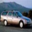

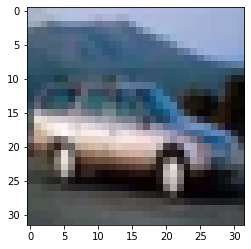

In [35]:
pic = array_to_img(x_train_all[4])
display(pic)
plt.imshow(x_train_all[4])
plt.show()

In [36]:
print(y_train_all.shape)
print(x_train_all.shape)
print('image shape: ',x_train_all[0].shape)

(50000, 1)
(50000, 32, 32, 3)
image shape:  (32, 32, 3)


In [37]:
y_train_all[4][0]

1

In [38]:
LABEL_NAMES[y_train_all[4][0]]

'car'

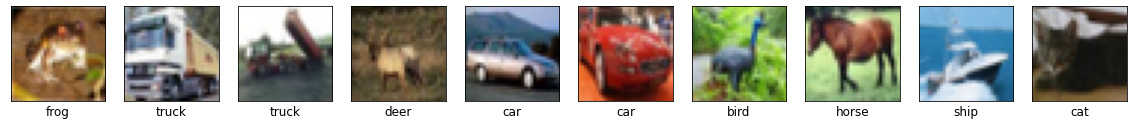

In [39]:
plt.figure(figsize=(20, 10)) 
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=12)
    plt.imshow(x_train_all[i])

# Preprocess data

In [40]:
#to check the individual element
type(x_train_all[0][0][0][0])
x_train_all.shape

(50000, 32, 32, 3)

In [41]:
#to minimize learning rate, we downsize the image pixels into 0 and 1
x_train_all, x_test = x_train_all/255.0, x_test/255.0

In [42]:
#to check the individual element
type(x_train_all[0][0][0][0])

numpy.float64

In [43]:
#flattening dimentions: train
x_train_all.shape[0]
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [44]:
x_train_all.shape

(50000, 3072)

In [45]:
#flattening dimentions: train
x_test.shape[0]
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
x_test.shape

(10000, 3072)

 # Create Validation dataset

In [46]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [47]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

# Create a small Cluster(for illustration)

In [48]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define Neural Network using Keras

In [49]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [52]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS, )))
model_2.add( Dense(units=128,activation='relu', name='m1_hidden1'))
model_2.add( Dense(units=64, activation='relu', name='m1_hidden2'))
model_2.add( Dense(units=16, activation='relu', name='m1_hidden3'))
model_2.add( Dense(units=10, activation='softmax', name='m1_output'))
model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS, )))
model_3.add( Dense(units=128,activation='relu', name='m1_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add( Dense(units=64, activation='relu', name='m1_hidden2'))
model_3.add( Dense(units=16, activation='relu', name='m1_hidden3'))
model_3.add( Dense(units=10, activation='softmax', name='m1_output'))
model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [53]:
type(model_1)

keras.engine.sequential.Sequential

In [54]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [55]:
#how parameters are calculated
param_m1_hidden1 = 32*32*3*128 + 128 #input(32*32*3 inputs given) * no.of neurons(128) + bias for each neuron(128)
param_m1_hidden2 = 128*64 + 64 #input(128 from hidden layer 1) * no.of neurons(64) + bias for each neuron(64)
param_m1_hidden3 = 64*16 + 16 #input(64 from hidden layer 2) * no.of neurons(16) + bias for each neuron(16)
param_m1_output = 16*10 + 10 #input(16 from hidden layer 3) * no.of neurons(10) + bias for each neuron(10)

total_params = param_m1_hidden1 + param_m1_hidden2 + param_m1_hidden3 + param_m1_output
print('total params: ',total_params)

total params:  402810


# TensorBoard [Visualizing Learning]

In [56]:
def get_tensorboard(model_name):
    folder_name = f'model_name at {strftime("%H %M")}'
    print(folder_name)
    dir_paths = os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as err:    
        print(err.strerror)
    else:
        print('Successfully created the directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [57]:
samples_per_batch = 1000
nr_epochs = 150

In [ ]:
nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, 
            epochs=nr_epochs,verbose=0, callbacks=[get_tensorboard('model 1')],
           validation_data=(x_val, y_val))

In [58]:
nr_epochs = 150
model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, 
            epochs=nr_epochs,verbose=0, callbacks=[get_tensorboard('model 2')],
           validation_data=(x_val, y_val))

model_name at 21 42
Successfully created the directory


In [60]:
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

model_name at 21 49
Successfully created the directory


In [89]:
nr_epochs = 10
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=1, validation_data=(x_val, y_val))

model_name at 22 29
Successfully created the directory
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 6s 145us/step - loss: 1.3356 - accuracy: 0.5234 - val_loss: 1.4238 - val_accuracy: 0.4904
Epoch 2/10
40000/40000 [==============================] - 6s 138us/step - loss: 1.3331 - accuracy: 0.5253 - val_loss: 1.4494 - val_accuracy: 0.4908
Epoch 3/10
40000/40000 [==============================] - 6s 140us/step - loss: 1.3291 - accuracy: 0.5238 - val_loss: 1.4236 - val_accuracy: 0.4979
Epoch 4/10
40000/40000 [==============================] - 6s 141us/step - loss: 1.3295 - accuracy: 0.5267 - val_loss: 1.4189 - val_accuracy: 0.4929
Epoch 5/10
40000/40000 [==============================] - 6s 139us/step - loss: 1.3274 - accuracy: 0.5250 - val_loss: 1.4167 - val_accuracy: 0.4972
Epoch 6/10
40000/40000 [==============================] - 6s 140us/step - loss: 1.3311 - accuracy: 0.5220 - val_loss: 1.4157 - val_accuracy: 0.5022
Epoch 7

In [88]:
nr_epochs = 50
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=1, validation_data=(x_val, y_val))

model_name at 22 24
Successfully created the directory
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 6s 154us/step - loss: 1.6137 - accuracy: 0.4182 - val_loss: 1.5423 - val_accuracy: 0.4544
Epoch 2/50
40000/40000 [==============================] - 6s 145us/step - loss: 1.6004 - accuracy: 0.4291 - val_loss: 1.5223 - val_accuracy: 0.4564
Epoch 3/50
40000/40000 [==============================] - 6s 148us/step - loss: 1.6103 - accuracy: 0.4221 - val_loss: 1.5305 - val_accuracy: 0.4546
Epoch 4/50
40000/40000 [==============================] - 6s 147us/step - loss: 1.6112 - accuracy: 0.4227 - val_loss: 1.5302 - val_accuracy: 0.4481
Epoch 5/50
40000/40000 [==============================] - 6s 146us/step - loss: 1.6103 - accuracy: 0.4238 - val_loss: 1.5225 - val_accuracy: 0.4521
Epoch 6/50
40000/40000 [==============================] - 7s 169us/step - loss: 1.5969 - accuracy: 0.4238 - val_loss: 1.5177 - val_accuracy: 0.4564
Epoch 7

# Predictions for individual data

In [64]:
x_val[0].shape

(3072,)

In [65]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [66]:
np.set_printoptions(precision=3)

In [67]:
model_2.predict(test)

array([[0.022, 0.009, 0.145, 0.133, 0.098, 0.178, 0.374, 0.039, 0.001,
        0.003]], dtype=float32)

In [68]:
model_2.predict(x_val).shape

(10000, 10)

In [69]:
model_2.predict_classes(test)

array([6], dtype=int64)

In [70]:
y_val[0]

array([6], dtype=uint8)

In [71]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = model_2.predict_classes(test_img)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 4
Actual value: 1 vs. predicted: 8
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 0
Actual value: 3 vs. predicted: 7


# Evaluation

In [72]:
model_2.metrics_names

['loss', 'accuracy']

In [73]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 97us/step
Test loss is 1.4 and test accuracy is 50.1%


### Confusion Matrix

In [74]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [75]:
print(conf_matrix.shape)
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]
print(conf_matrix.max())
print(conf_matrix.min())
print(conf_matrix[0])

(10, 10)
664
8
[609  33  69  19  22  12  31  28 134  43]


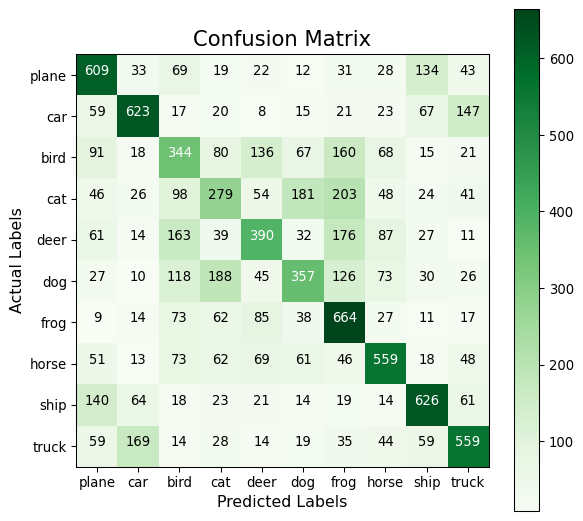

In [86]:
plt.figure(figsize=(7,7), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

In [77]:
# True Positives
np.diag(conf_matrix)

array([609, 623, 344, 279, 390, 357, 664, 559, 626, 559], dtype=int64)

In [78]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.609, 0.623, 0.344, 0.279, 0.39 , 0.357, 0.664, 0.559, 0.626,
       0.559])

In [79]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.529, 0.633, 0.349, 0.349, 0.462, 0.448, 0.448, 0.576, 0.619,
       0.574])

In [80]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 50.10%


In [81]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 49.87%
Model 2 f score is 49.98%
